In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import time
import unittest
import tqdm.notebook as tq
import solitaire_env
import sys
import seaborn as sns
sys.setrecursionlimit(10**6)

In [2]:
# import time
# start = time.time()


# count = 0
# actions = [0]*6
# fail = [0]*6
# different_states = []
# for j in tqdm(range(1000)):
#     en = solitaire_env.env()
#     for i in range(10000):

#         action = random.sample(range(6),1)[0]
        
#         actions[action]+=1

#         won,failed = en.step(action)
        
#         if failed:
#             fail[action]+=1
#         #print(i+1,action,won)
#         if won == True:
#             count+=1
#             break
#     different_states.append(len(en.hashable_map.keys()))

# print(count)
#print(time.time()-start)

In [3]:
#en.get_pile()

In [4]:
#en.get_foundation()

In [5]:
#en.get_tableau()

In [6]:

start = time.time()


count = 0

number_of_games = 800

action_type = {0:'tableau_to_foundation_reveal',\
               1:'to_foundation_stack',2:'tableau_to_tableau_reveal',\
               3:'pile_to_tableau',\
                4:'foundation_to_tableau',\
               5:'tableau_to_tableau_not_reveal'\
              }


actions_for_each_game = [0]*number_of_games
iterations_used_per_game = [0]*number_of_games
different_states_per_game = [0]*number_of_games

def greedy_policy(en,action_number,tot,action_freq,actions_matrix,game,fp_flag=False):
    
#     if action_number >= tot:
#         return False


    actions_m = []
    
    for step in range(tot):
        
        for action in range(6):
            
            won,taken = en.step(action,fp_flag)
            
             
            if won == True:
                action_freq[action]+=1
                actions_m.append(action)
                
                
                actions_matrix[game] = [game,actions_m,en.state] 
                return step,True
            if taken == True:
                action_freq[action]+=1
                actions_m.append(action)
                
                break

        if taken == False:
            
            actions_matrix[game] = [game,actions_m,en.state] 
            
            return step,False
        
       
    actions_matrix[game] = [game,actions_m,en.state] 
    
    
    
    return step,False
        
        
actions_matrix = [0]*number_of_games

start_states = {}

for this_game in tq.tqdm(range(number_of_games)):
    
    
    en = solitaire_env.env()
    tot = 20000
    action_freq = {0:0,1:0,2:0,3:0,4:0,5:0}
    
    start_states[this_game] = en.state
    step,won = greedy_policy(en,1,tot,action_freq,actions_matrix,this_game,fp_flag=True)
             
        
    if won == True:
        count+=1
        
    actions_for_each_game[this_game] = action_freq
    different_states_per_game[this_game] = len(en.hashable_map.keys())
    iterations_used_per_game[this_game] = step
    
print((time.time()-start)/60)


44.20779311656952


In [10]:
count


0

In [90]:
it = pd.DataFrame(data = {"iterations":iterations_used_per_game})['iterations'].value_counts()

In [91]:
it

19999    312
12        59
13        56
17        51
16        42
14        39
15        36
11        35
10        31
18        25
19        24
9         20
8         12
21        10
7          9
22         8
20         7
23         6
26         4
6          4
5          3
24         3
28         1
27         1
30         1
3          1
Name: iterations, dtype: int64

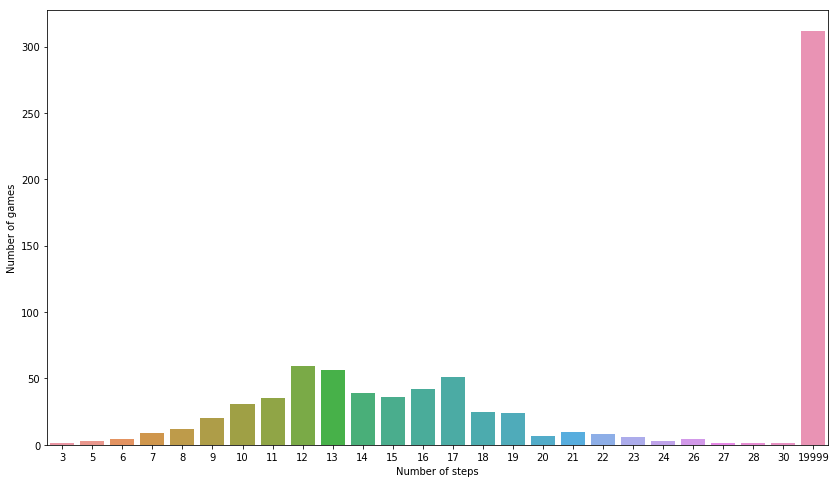

In [93]:
plt.figure(figsize=(14,8))
plt.xlabel("Number of steps")
plt.ylabel("Number of games")
sns.barplot(it.index,it.values)
plt.savefig("Foundation_Progression_included.jpg")

In [11]:

len(actions_matrix[0][1])

15

In [12]:
action_count = [len(actions_matrix[i][1]) for i in range(number_of_games)]

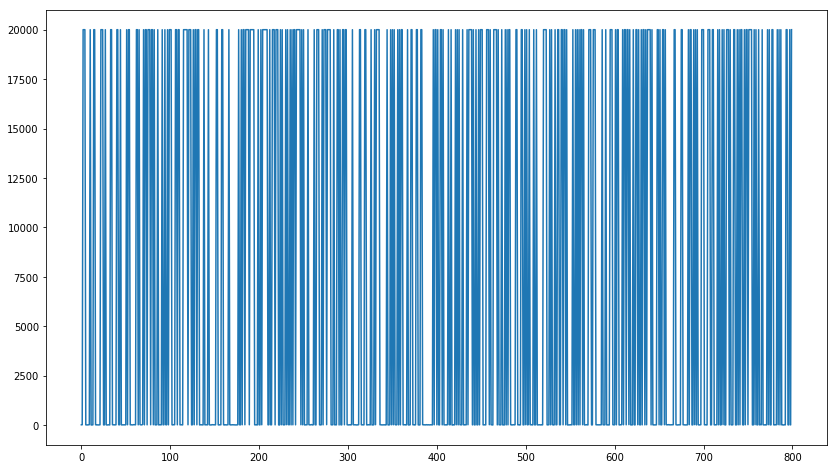

In [13]:
plt.figure(figsize=(14,8))
plt.plot(range(number_of_games),action_count)

In [14]:
actions_matrix.sort(key = lambda x:len(x[1]))

In [15]:
actions_matrix[0]

[418, [1, 3, 3], <solitaire_env.state at 0x7f6efae61358>]

In [65]:
max_step_games = []
for i in range(number_of_games):
    if len(actions_matrix[i][1]) == tot:
        action_string = "".join([str(x) for  x in actions_matrix[i][1]])
        max_step_games.append([actions_matrix[i][0],action_string,actions_matrix[i][2]])
        

In [66]:
len(max_step_games)

312

In [67]:
k = 0
game_no, game_action_seq, game_end_state = max_step_games[k]

[0, 9995, 0, 15, 9990, 0]


<BarContainer object of 6 artists>

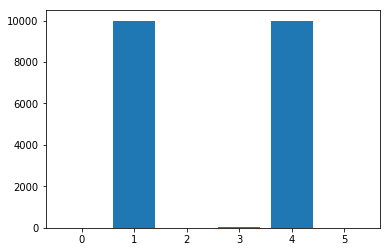

In [68]:

mp = actions_for_each_game[game_no]
values = [mp[i] for i in range(6)]
print(values)
plt.bar([0,1,2,3,4,5],values)

In [104]:
en.state = start_states[game_no]


## Start of game 

In [105]:
en.get_pile()

suit = spade      color = black      number =    12 speciality = QUEEN      face = up   
suit = heart      color = red        number =    12 speciality = QUEEN      face = up   
suit = heart      color = red        number =     5 speciality = None       face = up   
suit = diamond    color = red        number =    11 speciality = JACK       face = up   
suit = club       color = black      number =     7 speciality = None       face = up   
suit = diamond    color = red        number =     6 speciality = None       face = up   
suit = diamond    color = red        number =    10 speciality = None       face = up   
suit = spade      color = black      number =    10 speciality = None       face = up   
suit = heart      color = red        number =     8 speciality = None       face = up   
suit = diamond    color = red        number =     9 speciality = None       face = up   
suit = heart      color = red        number =    11 speciality = JACK       face = up   
suit = spade      col

In [106]:
en.get_foundation()

printing foundation number 1 ********************
printing foundation number 2 ********************
printing foundation number 3 ********************
printing foundation number 4 ********************


In [107]:
en.get_tableau()

printing tableau number 1 ********************
suit = spade      color = black      number =     7 speciality = None       face = up   
printing tableau number 2 ********************
suit = spade      color = black      number =     6 speciality = None       face = up   
suit = heart      color = red        number =     2 speciality = None       face = up   
printing tableau number 3 ********************
suit = club       color = black      number =     3 speciality = None       face = up   
suit = spade      color = black      number =     5 speciality = None       face = up   
suit = heart      color = red        number =    10 speciality = None       face = up   
printing tableau number 4 ********************
suit = diamond    color = red        number =     1 speciality = ACE        face = up   
suit = club       color = black      number =    13 speciality = KING       face = up   
suit = club       color = black      number =    10 speciality = None       face = up   
suit = club

## After taking n number of steps

In [140]:
this_game_actions = game_action_seq[:18]
print(this_game_actions)
count1 = 0
for c in this_game_actions:
    if c == '1':
        count1+=1
        
print(count1,len(this_game_actions)-count1)

111111333333333333
6 12


In [141]:
en.state = start_states[game_no]
for a in this_game_actions:
    action = int(a)
    w,t = en.step(action,fp_flag=True)

In [142]:
en.get_foundation()

printing foundation number 1 ********************
printing foundation number 2 ********************
suit = heart      color = red        number =     1 speciality = ACE        face = up   
suit = heart      color = red        number =     2 speciality = None       face = up   
printing foundation number 3 ********************
printing foundation number 4 ********************
suit = spade      color = black      number =     1 speciality = ACE        face = up   
suit = spade      color = black      number =     2 speciality = None       face = up   
suit = spade      color = black      number =     3 speciality = None       face = up   
suit = spade      color = black      number =     4 speciality = None       face = up   


In [143]:
en.get_pile()

suit = heart      color = red        number =    12 speciality = QUEEN      face = up   
suit = heart      color = red        number =     5 speciality = None       face = up   
suit = diamond    color = red        number =    10 speciality = None       face = up   
suit = heart      color = red        number =    11 speciality = JACK       face = up   
suit = spade      color = black      number =    13 speciality = KING       face = up   
suit = diamond    color = red        number =     4 speciality = None       face = up   
suit = diamond    color = red        number =     3 speciality = None       face = up   
suit = heart      color = red        number =    13 speciality = KING       face = up   
suit = diamond    color = red        number =     8 speciality = None       face = up   


In [144]:
en.get_tableau()

printing tableau number 1 ********************
suit = spade      color = black      number =     7 speciality = None       face = up   
suit = heart      color = red        number =     6 speciality = None       face = up   
suit = club       color = black      number =     5 speciality = None       face = up   
printing tableau number 2 ********************
suit = spade      color = black      number =     6 speciality = None       face = up   
printing tableau number 3 ********************
suit = club       color = black      number =     3 speciality = None       face = up   
suit = spade      color = black      number =     5 speciality = None       face = up   
suit = heart      color = red        number =    10 speciality = None       face = up   
printing tableau number 4 ********************
suit = diamond    color = red        number =     1 speciality = ACE        face = up   
suit = club       color = black      number =    13 speciality = KING       face = up   
suit = club

## End state

In [145]:
end_en = solitaire_env.env()
end_en.state = game_end_state
end_en.get_foundation()

printing foundation number 1 ********************
printing foundation number 2 ********************
suit = heart      color = red        number =     1 speciality = ACE        face = up   
suit = heart      color = red        number =     2 speciality = None       face = up   
printing foundation number 3 ********************
printing foundation number 4 ********************
suit = spade      color = black      number =     1 speciality = ACE        face = up   
suit = spade      color = black      number =     2 speciality = None       face = up   
suit = spade      color = black      number =     3 speciality = None       face = up   


In [146]:
end_en.get_pile()

suit = heart      color = red        number =    12 speciality = QUEEN      face = up   
suit = diamond    color = red        number =    10 speciality = None       face = up   
suit = heart      color = red        number =    11 speciality = JACK       face = up   
suit = spade      color = black      number =    13 speciality = KING       face = up   
suit = heart      color = red        number =    13 speciality = KING       face = up   
suit = diamond    color = red        number =     8 speciality = None       face = up   


In [147]:
end_en.get_tableau()

printing tableau number 1 ********************
suit = spade      color = black      number =     7 speciality = None       face = up   
suit = heart      color = red        number =     6 speciality = None       face = up   
suit = club       color = black      number =     5 speciality = None       face = up   
suit = diamond    color = red        number =     4 speciality = None       face = up   
printing tableau number 2 ********************
suit = spade      color = black      number =     6 speciality = None       face = up   
suit = diamond    color = red        number =     5 speciality = None       face = up   
suit = club       color = black      number =     4 speciality = None       face = up   
suit = diamond    color = red        number =     3 speciality = None       face = up   
printing tableau number 3 ********************
suit = club       color = black      number =     3 speciality = None       face = up   
suit = spade      color = black      number =     5 specia

## Check result of single action

In [148]:
e1 = end_en.state
w,t = end_en.step(1,fp_flag=True)

In [149]:
w,t

(False, True)

In [150]:
len(end_en.state.pile)

6

In [151]:
end_en.get_pile()

suit = heart      color = red        number =    12 speciality = QUEEN      face = up   
suit = diamond    color = red        number =    10 speciality = None       face = up   
suit = heart      color = red        number =    11 speciality = JACK       face = up   
suit = spade      color = black      number =    13 speciality = KING       face = up   
suit = heart      color = red        number =    13 speciality = KING       face = up   
suit = diamond    color = red        number =     8 speciality = None       face = up   


In [152]:
end_en.get_foundation()

printing foundation number 1 ********************
printing foundation number 2 ********************
suit = heart      color = red        number =     1 speciality = ACE        face = up   
suit = heart      color = red        number =     2 speciality = None       face = up   
printing foundation number 3 ********************
printing foundation number 4 ********************
suit = spade      color = black      number =     1 speciality = ACE        face = up   
suit = spade      color = black      number =     2 speciality = None       face = up   
suit = spade      color = black      number =     3 speciality = None       face = up   
suit = spade      color = black      number =     4 speciality = None       face = up   


In [153]:
end_en.get_tableau()

printing tableau number 1 ********************
suit = spade      color = black      number =     7 speciality = None       face = up   
suit = heart      color = red        number =     6 speciality = None       face = up   
suit = club       color = black      number =     5 speciality = None       face = up   
suit = diamond    color = red        number =     4 speciality = None       face = up   
printing tableau number 2 ********************
suit = spade      color = black      number =     6 speciality = None       face = up   
suit = diamond    color = red        number =     5 speciality = None       face = up   
suit = club       color = black      number =     4 speciality = None       face = up   
suit = diamond    color = red        number =     3 speciality = None       face = up   
printing tableau number 3 ********************
suit = club       color = black      number =     3 speciality = None       face = up   
suit = spade      color = black      number =     5 specia

In [154]:
e2 = end_en.state

#### Second Action

In [155]:
w,t = end_en.step(4,fp_flag=True)

In [156]:
w,t

(False, True)

In [157]:
end_en.get_pile()

suit = heart      color = red        number =    12 speciality = QUEEN      face = up   
suit = diamond    color = red        number =    10 speciality = None       face = up   
suit = heart      color = red        number =    11 speciality = JACK       face = up   
suit = spade      color = black      number =    13 speciality = KING       face = up   
suit = heart      color = red        number =    13 speciality = KING       face = up   
suit = diamond    color = red        number =     8 speciality = None       face = up   


In [158]:
end_en.get_foundation()

printing foundation number 1 ********************
printing foundation number 2 ********************
suit = heart      color = red        number =     1 speciality = ACE        face = up   
suit = heart      color = red        number =     2 speciality = None       face = up   
printing foundation number 3 ********************
printing foundation number 4 ********************
suit = spade      color = black      number =     1 speciality = ACE        face = up   
suit = spade      color = black      number =     2 speciality = None       face = up   
suit = spade      color = black      number =     3 speciality = None       face = up   


In [159]:
end_en.get_tableau()

printing tableau number 1 ********************
suit = spade      color = black      number =     7 speciality = None       face = up   
suit = heart      color = red        number =     6 speciality = None       face = up   
suit = club       color = black      number =     5 speciality = None       face = up   
suit = diamond    color = red        number =     4 speciality = None       face = up   
printing tableau number 2 ********************
suit = spade      color = black      number =     6 speciality = None       face = up   
suit = diamond    color = red        number =     5 speciality = None       face = up   
suit = club       color = black      number =     4 speciality = None       face = up   
suit = diamond    color = red        number =     3 speciality = None       face = up   
printing tableau number 3 ********************
suit = club       color = black      number =     3 speciality = None       face = up   
suit = spade      color = black      number =     5 specia

In [ ]:
def compare_states(state1,state2):

    def compare_cards(card1,card2):
        
        if card1.number == card2.number and card1.face == card2.face and card1.suit == card2.suit:
            return True
        
        return False
    
    
    def check_pile(p1,p2):

        if len(p1) != len(p2):
            return False

        for cd1,cd2 in zip(p1,p2):
            
            if compare_cards(card1,card2) is False:
                return False
            
            
        return True
    
    